Add the package to the path.

In [1]:
import sys
sys.path.append("/home/ace07/Documents/GitHub/QICKIT")

Import `qickit` modules. For this demo, we will import the circuit instances.

In [2]:
from qickit.circuit import QiskitCircuit, PennylaneCircuit, CirqCircuit, TKETCircuit

Quantum computing can be understood as simply the multiplication (contraction) of complex-valued vectors known as quantum states $\ket{\psi}$ and complex-valued matrices known as quantum operators $A$:

$$
\ket{\psi'} = A\ket{\psi}
$$

Where the output of our computation is the updated state $\ket{\psi'}$ which is the distribution we extract using measurement. `qickit` aims to solely support exact state preparation as part of the higher-level programming with quantum computers, boiling down the algorithms to vectors and matrices. With that being said, we provide both Shende et al. and Mottonen et al. approaches which have a $O(2^{N+1})$ depth scaling.

In [3]:
from qickit.synthesis.statepreparation import Shende, Mottonen
from qickit.synthesis.unitarypreparation import QiskitUnitaryTranspiler

### State Preparation Demo : Preparing quantum states

This notebook is dedicated to the demonstration of how `qickit` can be used to create gate-based circuits to prepare arbitrary quantum states.

To prepare states, we simply need to instantiate an encoder, using either `Mottonen` or `Shende` encoders, and calling the `.prepare_state()` method to extract the circuit preparing the state. When instantiating the encoder, we must also choose which framework to use for the circuit creation.

In [6]:
import pandas as pd

# Load in the resized MNIST dataset
dataset = pd.read_csv('datasets/mnist-resized.csv')

# Convert the dataset to a numpy array
images = dataset.to_numpy()[:,1:].reshape(30018, 8, 8)

# Get the first image
test_image = images.reshape(30018, 8, 8)[0, :]

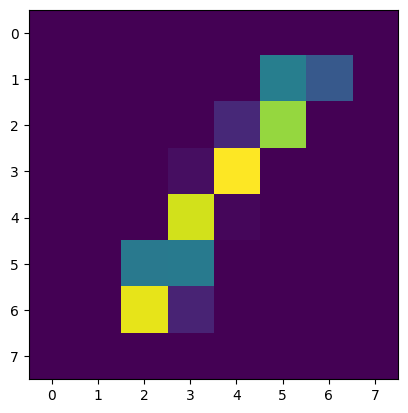

In [7]:
import matplotlib.pyplot as plt

plt.imshow(test_image)

/tmp/ipykernel_510533/2734618902.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  statevector = encoded_circuit.get_statevector().astype(float)


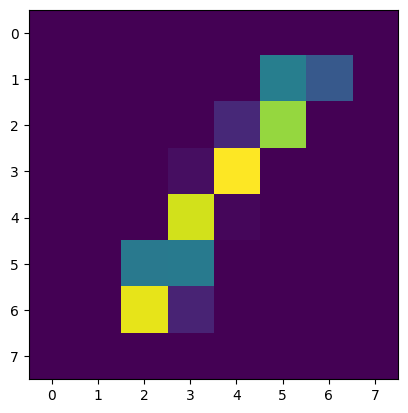

In [9]:
# Instantiate the encoder
shende_encoder = Mottonen(QiskitCircuit)

# Define the data to be encoded
encoded_circuit = shende_encoder.prepare_state(test_image.flatten())

# Extract the statevector
statevector = encoded_circuit.get_statevector().astype(float)

# Plot the statevector
plt.imshow(statevector.reshape(8, 8))

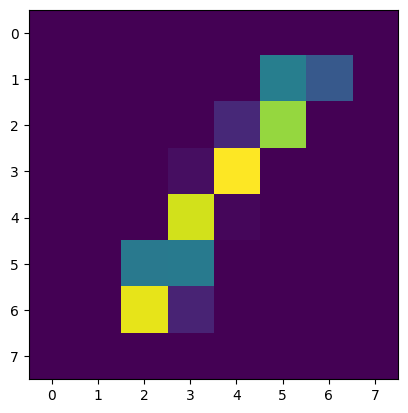

In [7]:
# Instantiate the encoder
shende_encoder = Shende(QiskitCircuit)

# Define the data to be encoded
encoded_circuit = shende_encoder.prepare_state(test_image.flatten())

# Extract the statevector
statevector = encoded_circuit.get_statevector()

# Plot the statevector
plt.imshow(statevector.reshape(8, 8))

We can use any of the supported frameworks as well.

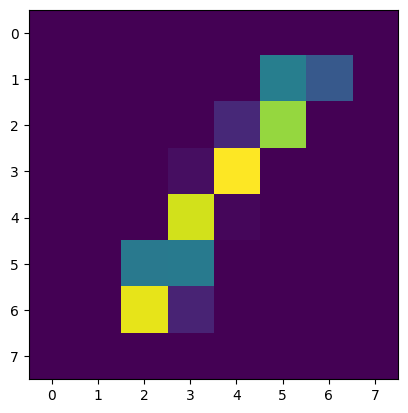

In [8]:
# Instantiate the encoder
shende_encoder = Shende(PennylaneCircuit)

# Define the data to be encoded
encoded_circuit = shende_encoder.prepare_state(test_image.flatten())

# Extract the statevector
statevector = encoded_circuit.get_statevector()

# Plot the statevector
plt.imshow(statevector.reshape(8, 8))

### Unitary Preparation demo : Preparing Quantum Operators

This notebook is dedicated to the demonstration of how `qickit` can be used to create gate-based circuits to prepare arbitrary quantum operators.

To prepare states, we simply need to instantiate a unitary encoder, and calling the `.prepare_unitary()` method to extract the circuit preparing the operator. When instantiating the encoder, we must also choose which framework to use for the circuit creation.

In [4]:
import numpy as np


# Define the Bell state
bell_state = QiskitCircuit(2)

bell_state.H(0)
bell_state.CX(0, 1)

# Extract the unitary representation of the circuit
unitary = bell_state.get_unitary()
print(f"The unitary representation: \n{unitary}\n")
# Instantiate the encoder
unitary_encoder = QiskitUnitaryTranspiler(output_framework=QiskitCircuit)

# Prepare the unitary
encoded_circuit = unitary_encoder.prepare_unitary(unitary)

# Extract the unitary representation of the circuit
encoded_unitary = encoded_circuit.get_unitary()
print(f"The encoded unitary representation: \n{encoded_unitary}\n")

print(f"Are the unitaries equal? {np.allclose(unitary, encoded_unitary)}")

The unitary representation: 
[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]

[[ 1.00000000e+00+0.j -2.23711432e-17+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [-2.23711432e-17+0.j  1.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  1.00000000e+00+0.j
   2.23711432e-17+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.23711432e-17+0.j
   1.00000000e+00+0.j]]
The encoded unitary representation: 
[[ 7.07106781e-01-3.36795208e-17j  7.07106781e-01+5.29160848e-17j
  -7.24600603e-17-1.11022302e-16j -1.19718857e-17-5.55111512e-17j]
 [-2.82754265e-18-1.66533454e-16j  3.74712469e-17+0.00000000e+00j
   7.07106781e-01-7.88431887e-16j -7.07106781e-01+6.67025533e-16j]
 [ 1.19718857e-17-1.11022302e-16j  7.24600603e-17-5.55111

<p>© 2024 Qualition Computing, all rights reserved.</p>